In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

**Clustering**

In [ ]:
data_fr = pd.read_csv("BigQuery_Ethereum_Dataset.csv")

In [ ]:
data_fr.rename(columns={"input":"from", "output":"to"}, inplace=True)

In [ ]:
cluster_list = [[]]

for index, row in data_fr.iterrows():
  print(row)
  count = 0
  for i, cluster in enumerate(cluster_list):
    # if row["from"] in cluster and row["to"] in cluster:
    #   continue
    if row["from"] in cluster and row["to"] not in cluster :

      cluster.append(row["to"])
    if row["to"] in cluster and row["from"] not in cluster:

      cluster.append(row["from"])
    if row["to"] not in cluster and row["from"] not in cluster:
      count += 1
      if count == len(cluster_list):
        new_cluster = [row["to"],row["from"]]
        cluster_list.append(new_cluster)

Streaming output truncated to the last 5000 lines.
to      0x7a250d5630b4cf539739df2c5dacb4c659f2488d
Name: 27215, dtype: object
from    0x6a5c55e8f2bcab6d80e3e7d205b933814dcefcd3
to      0xe701fa4405bfc7f9b85f2068125473c226026535
Name: 27216, dtype: object
from    0x965eadf58da286fc3780f0356623d7cf9e5b766e
to      0x7a250d5630b4cf539739df2c5dacb4c659f2488d
Name: 27217, dtype: object
from    0xea674fdde714fd979de3edf0f56aa9716b898ec8
to      0x51546ae067c79854feee2a75421f9ca9d531a329
Name: 27218, dtype: object
from    0x139ea097c98bcaf8b73666f4d629786292736053
to      0x7a250d5630b4cf539739df2c5dacb4c659f2488d
Name: 27219, dtype: object
from    0xb047e5845ce7c26c915a5b4861d990f61b77e4a4
to      0x7a250d5630b4cf539739df2c5dacb4c659f2488d
Name: 27220, dtype: object
from    0xfbabe6c2329e77faba7f8ef8c7de3c90a30261fe
to      0xabc8ef4a9e2655b1e1969afb59f7fea18b96e488
Name: 27221, dtype: object
from    0xab53e599e7fe1e78ccdd7118a44b74a338e45536
to      0x7a250d5630b4cf539739df2c5dacb4c659f2

In [ ]:
print(len(cluster_list))

5288


In [ ]:
# list merge function
def merge_list(lista, listb):
  for ele in listb:
    if ele not in lista:
      lista.append(ele)
  return lista
  
# check list jointable function
def check_joint(lista, listb):
  #print("lists must be not None!")
  
  for ele in lista:
    if ele in listb:
      return True
    else:
      return False

In [ ]:
cluster_list.remove(cluster_list[0])

['0xc4854941da0034a7ca1f610d0a3012dc7f8f9fe7', '0x68b22215ff74e3606bd5e6c1de8c2d68180c85f7', '0x98edbde664ceca21b3e36d2d91aa3a84392bf3bc', '0x402f03fd009dfd5a2858e100dd1dea0bd71e7cfd', '0x04d77ceff4c092e432d8c7300ddc8727e332da54', '0x253cee159db9a69fd49f7361d824cd86e7a20c65', '0x361c6f2930d4d081d9530fc5c3e44c8ca621fc52', '0xc9bd6c649822e2f48e824f0361e4157af34be22c', '0xa3ceaa74ff60f251b76bd2d188c163a88f5b9eb4', '0xafe723a6a307993358419e6f1ddae11ad5b40fb9', '0x71179e027ef4c2611aeef62cbdad0b29633b4e2a', '0xcd554dde6f5345f2fa16775c0e2a563708243290', '0x40650db0ae8bfd4d5a80a1fb06efc439186699cb', '0xbd1d1a852418f9f41068ace4ee7aea6abe2105b9', '0x03271a3bb91da82fc95ec73570273d48bc72309a', '0x3b80ec089fb29c2518d4c64ff60b8cba6e9420be', '0x85a311116c99a68f987098a9bd323d6c15e6a8b1', '0x6b2aaff34d14cf1d13f327dfad11c22fbc5a574c', '0x8b006c2751e17143640403910d626a1c8f0ec6f4', '0x985f1315b9d63300c42e13936b7a0e21f8ee258e', '0xc7a100a8164ece9204be78cfb22746905d04825d', '0xed8887800289b2a7fdaae39551cb07

In [ ]:
cluster_list = new_cluster_list.copy()

In [ ]:
new_cluster_list = []
black_list_id = []
count_merge = 0
while (len(cluster_list) > 0):
  #print("{} - {}".format(len(cluster_list), len(new_cluster_list)))
  new_cluster = cluster_list[0]
  for index, cluster in enumerate(cluster_list):
    if check_joint(new_cluster, cluster):
      count_merge += 1
      new_cluster = merge_list(new_cluster, cluster)
      cluster_list.remove(cluster_list[index])
  new_cluster_list.append(new_cluster)


In [ ]:
num_nodes_in_clusters = []
for index, element in enumerate(cluster_list):
  row = {"cluster": index, "number_of_nodes": len(element)}
  num_nodes_in_clusters.append(row)


In [ ]:
num_node_cluster_sort = sorted(num_nodes_in_clusters, key = lambda row_:row_['number_of_nodes'], reverse=True)

In [ ]:
print(num_node_cluster_sort)

[{'cluster': 2, 'number_of_nodes': 15899}, {'cluster': 0, 'number_of_nodes': 5746}, {'cluster': 42, 'number_of_nodes': 2180}, {'cluster': 53, 'number_of_nodes': 1775}, {'cluster': 151, 'number_of_nodes': 1672}, {'cluster': 222, 'number_of_nodes': 1464}, {'cluster': 485, 'number_of_nodes': 1330}, {'cluster': 841, 'number_of_nodes': 1204}, {'cluster': 50, 'number_of_nodes': 1182}, {'cluster': 257, 'number_of_nodes': 1055}, {'cluster': 30, 'number_of_nodes': 1040}, {'cluster': 1724, 'number_of_nodes': 950}, {'cluster': 2379, 'number_of_nodes': 947}, {'cluster': 1431, 'number_of_nodes': 896}, {'cluster': 427, 'number_of_nodes': 886}, {'cluster': 148, 'number_of_nodes': 771}, {'cluster': 963, 'number_of_nodes': 707}, {'cluster': 117, 'number_of_nodes': 680}, {'cluster': 197, 'number_of_nodes': 621}, {'cluster': 19, 'number_of_nodes': 457}, {'cluster': 84, 'number_of_nodes': 429}, {'cluster': 44, 'number_of_nodes': 413}, {'cluster': 539, 'number_of_nodes': 409}, {'cluster': 1041, 'number_of_

In [ ]:
num_node_cluster_sort_df = pd.DataFrame(num_node_cluster_sort)

In [ ]:
num_nodes = num_node_cluster_sort_df.number_of_nodes[:100]
cluster_name = num_node_cluster_sort_df.cluster[:100].astype(str)

Visualize clusters distribution

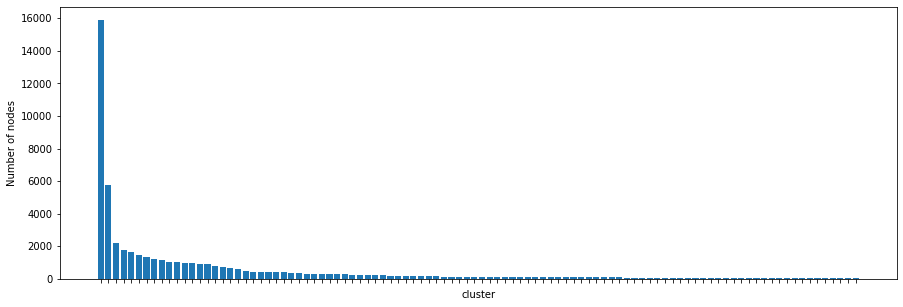

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(cluster_name, num_nodes)
plt.xlabel("cluster")
plt.ylabel("Number of nodes")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show()


In [ ]:
num_node_in_cluster_df = pd.DataFrame(num_nodes_in_clusters)
num_node_in_cluster_df.to_csv("Ethereum_clusters_list.csv", index=False)

In [ ]:
number_node_each_cluster = pd.read_csv("Ethereum_clusters_list.csv")
number_node_each_cluster.head(10)

,cluster,number_of_nodes
0,0,5746
1,1,17
2,2,15899
3,3,2
4,4,2
5,5,7
6,6,2
7,7,21
8,8,2
9,9,89


In [ ]:
num_nodes = 0
num_cluster_100 = 0
num_nodes_100 = 0
for index, row in number_node_each_cluster.iterrows():
  num_nodes = num_nodes + int(row["number_of_nodes"])
  if int(row["number_of_nodes"]) > 10:
    num_cluster_100 += 1
    num_nodes_100 = num_nodes_100 + int(row["number_of_nodes"])

print(num_nodes)
print(num_nodes_100)
print(num_cluster_100)

67614
56068
251


In [ ]:
num_cluster_100 = 251
num_nodes = 67614
num_nodes_100 = 56068

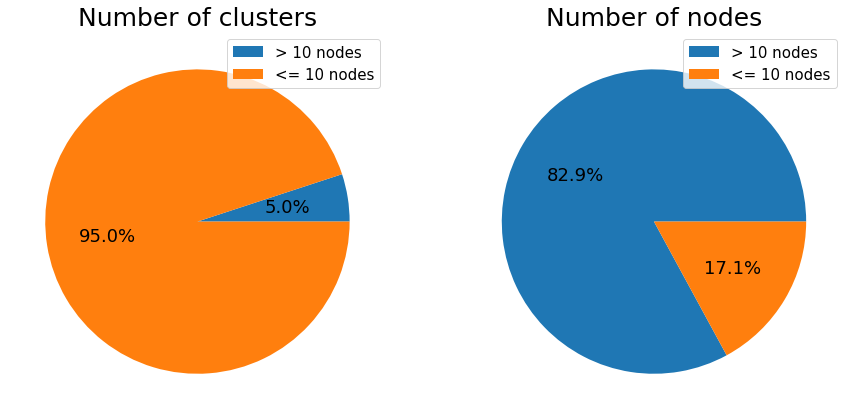

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.size'] = 18.0

cluster_lower = 4981 - num_cluster_100
node_lower = num_nodes - num_nodes_100
y = np.array([num_cluster_100,cluster_lower])
z = np.array([num_nodes_100, node_lower])

mylabels = ["> 10 nodes", "<= 10 nodes"]

fig1, (ax1,ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.set_title("Number of clusters", fontsize=25)
ax1.pie(y, autopct='%1.1f%%')
ax1.legend(labels = mylabels, fontsize=15)

ax2.set_title("Number of nodes", fontsize=25)
ax2.pie(z, autopct='%1.1f%%')
ax2.legend(labels = mylabels, fontsize=15)

plt.show()

**Filtering isolated tiny clusters**

In [ ]:
meaningful_nodes = []
for cluster in cluster_list:
  if len(cluster) > 300:
    for node in cluster:
      if node not in meaningful_nodes:
        meaningful_nodes.append(node)

In [ ]:
print(len(meaningful_nodes))

17021


In [ ]:
data_gas_df = pd.read_csv("BigQuery_Ethereum_Dataset.csv")

In [ ]:
pairs = []
pairs_value = []
count = 0
for index, row in data_gas_df.iterrows():
  #if str(row["input"]) != str(row["output"]):
  pair = {"from": row["input"], "to": row["output"], "gas": row["gas_used"]}
  if pair not in pairs:
    pairs.append(pair)
df_pairs = pd.DataFrame(pairs)
df_pairs.head(10)


,from,to,gas
0,0x68b22215ff74e3606bd5e6c1de8c2d68180c85f7,0xc4854941da0034a7ca1f610d0a3012dc7f8f9fe7,21000
1,0x7c896da2a58a6056dced0348dad02812099b2932,0x653430560be843c4a3d143d0110e896c2ab8ac0d,35065
2,0x698263ccb5dcdf6604e2b0f0bda74cba123c7b6c,0xe592427a0aece92de3edee1f18e0157c05861564,128629
3,0x6db5af4ddaa617b25e3a44081913f7883ba41d76,0xd6aed315dd0c2a64bea0be6d74b4ae43b83469fd,21000
4,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,0x00b241e729d7df1c0089bdf3a17614bee5a77b52,21000
5,0xaa98c7afabbc0ea3acdc029a9d71b9ac83ff8cef,0xaa10af674f726cf389fcf9c10ba7f3c9e11ac0e1,41980
6,0x0787ef13d96a708fa395727669d14a49e105029c,0x614befd25621f78bfaabb95397e5ed218d84ed28,21000
7,0xd0f14fa408fc4cab83f33315d4e60fe87df00e13,0x97122ddca38c29b7653d52b07998d06a7128fa0b,21000
8,0xd7a573dccac11c9ce895d722e76e5c546f08dce9,0x81ed6d02ecd01dbe8bbaeda6df9c21b10b1cb1ca,21000
9,0x6c569299c30ba3617b65b90615df279d4d4635f8,0xdac17f958d2ee523a2206206994597c13d831ec7,31097


In [ ]:
# new dataset
new_data_df = []
for index, row in df_pairs.iterrows():
  if row['from'] in meaningful_nodes or row['to'] in meaningful_nodes:
    new_row = {'from': row['from'], 'to': row['to'], 'gas': row['gas']}
    new_data_df.append(new_row)

In [ ]:
filter_dataset_300 = pd.DataFrame(new_data_df)
filter_dataset_300.to_csv("Data_filtered_clusters_300_nodes.csv", index=False)

In [ ]:
new_data_df = pd.read_csv("Data_filtered_clusters_300_nodes.csv")


**Masking nodes**

In [ ]:
address_list = []
trans_list = []
for index, row in new_data_df.iterrows():
  if row["from"] not in address_list:
    address_list.append(row["from"])
  if row["to"] not in address_list:
    address_list.append(row["to"])
  df_row = {'from': address_list.index(row["from"]),
            'to': address_list.index(row["to"]),
            'gas': row['gas']
            }
  trans_list.append(df_row)

In [ ]:
df_trans_list = pd.DataFrame(trans_list)
df_address_list = pd.DataFrame(address_list)

df_trans_list.to_csv("masked_dataset_300_filtered.csv", index=False)
df_address_list.to_csv("address_list_300_filtered_gas.csv", index=False)

**FICO Scoring**

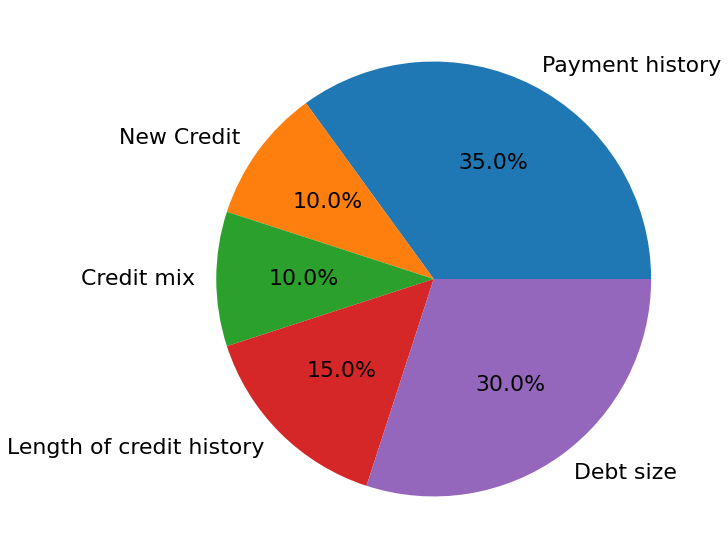

In [ ]:
# FICO score
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
mylabels = ["Payment history", "New Credit", "Credit mix", "Length of credit history", "Debt size"]
percent = np.array([35, 10, 10, 15, 30])
plt.pie(percent, labels= mylabels, autopct='%1.1f%%')
plt.show()